In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt


data = pd.read_csv('forestfires.csv')

X = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Ortalama Kare Hata (MSE): ", mse)
print("RMSE: ", rmse)
print("R^2 skoru: ", r2)

print("Katsayılar: ", model.coef_)

print("Intercept: ", model.intercept_)

lasso_cv_model = LassoCV(cv=10, max_iter = 100000).fit(X_train, y_train)
print("CV model alpha: ", lasso_cv_model.alpha_)

lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
print("Lasso tune edilmiş RMSE değeri: ", np.sqrt(mean_squared_error(y_test, y_pred)))

print("Tune edilmiş katsayı değerleri:\n", pd.Series(lasso_tuned.coef_, index = X_train.columns))

Ortalama Kare Hata (MSE):  11782.123655770964
RMSE:  108.5454911812138
R^2 skoru:  0.0004783320940269231
Katsayılar:  [-0.06217592  0.11092293 -0.01320167 -0.34645865  0.46683179 -0.14091798
  0.82511614 -0.72881337]
Intercept:  8.795128372107037
CV model alpha:  8.403643782415172
Lasso tune edilmiş RMSE değeri:  108.5454911812138
Tune edilmiş katsayı değerleri:
 FFMC   -0.000000
DMC     0.111497
DC     -0.011278
ISI    -0.000000
temp    0.000000
RH     -0.174065
wind    0.000000
rain   -0.000000
dtype: float64


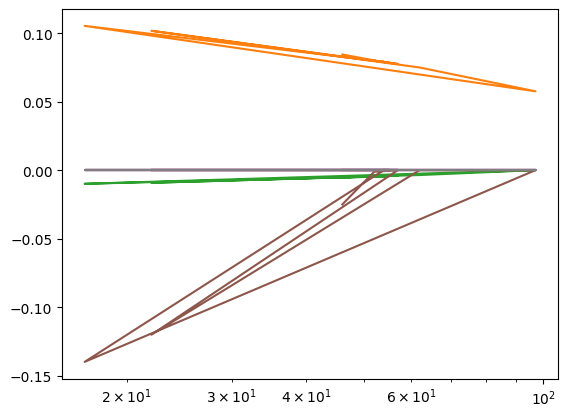

In [4]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0, 100, 10)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
